<a href="https://colab.research.google.com/github/upendarxl/Demo/blob/master/Project_0753625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="GREEN"><b>Upendar Yadav (0753625)</b></font>


**This notebook is divided into two parts**

**1.Exploratory data analysis (EDA)**

**2.Modeling and evaluation**


In [4]:
#Importing all the required libraries and functions.
import pandas as pd   
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

**Reading all the required data**

In [5]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv') #Reading train Dataset.
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv") #Reading test Dataset. 

In [7]:
test.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
5,381115,Male,22,1,30.0,1,< 1 Year,No,40207.0,152.0,266
6,381116,Female,51,1,37.0,1,1-2 Year,No,40118.0,26.0,107
7,381117,Male,25,1,41.0,1,< 1 Year,No,23375.0,152.0,232
8,381118,Male,42,1,41.0,0,1-2 Year,Yes,2630.0,26.0,277
9,381119,Female,37,1,12.0,1,1-2 Year,No,27124.0,124.0,133


In [8]:
df=train.copy()

In [9]:
df.shape  # shape of the dataset

(381109, 12)

In [10]:
df.isnull().sum() #None of the features are null values.

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
df.describe()    #Describe the data frame by providing count,mean etc. 


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [12]:
df.info() #Info about each feature of the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Number of columns and number of unique values present in it**


In [13]:
print('columns and number of unique values')
dict=[]
for i in df.columns:   #Looping through each coloumn
    print(f'{i} --> {df[i].nunique()}')

columns and number of unique values
id --> 381109
Gender --> 2
Age --> 66
Driving_License --> 2
Region_Code --> 53
Previously_Insured --> 2
Vehicle_Age --> 3
Vehicle_Damage --> 2
Annual_Premium --> 48838
Policy_Sales_Channel --> 155
Vintage --> 290
Response --> 2


**Separating the Categorical data**

In [14]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

<font color="red"><b>Exploratory Data Analysis<b><font>

**Count of Gender with respect to the target variable**

**Response for MALE is slightly greater than of female**

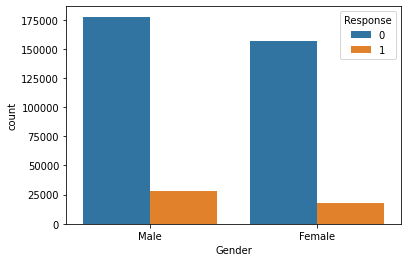

In [15]:
sns.countplot(data=df,x='Gender',hue='Response') #using seaborn library.

**Count of Gender with respect to the Previously injured**

**Response for MALE and Female are same**

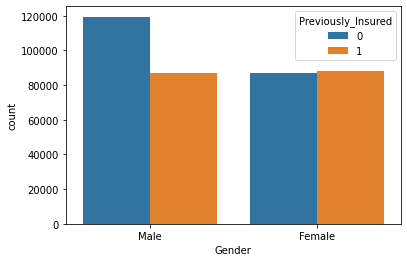

In [16]:
sns.countplot(data=df,x='Gender',hue='Previously_Insured') #using seaborn library.

**AGE vs PREVIOUSLY INJURED**

 

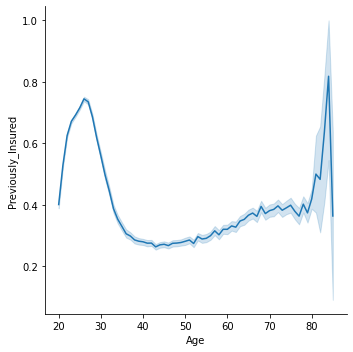

In [17]:
sns.relplot(data=df,x='Age',y='Previously_Insured',kind='line')

**VEHICLE AGE vs VEHICLE DAMAGE**

If the vehicle age is more then 2 years then the chances for damage is higher as compared to new one.


The vehicle with 1 year age have less damage then 2 years age vehicle.


The vehicle with less then 1 year of age are less likely to be damaged.


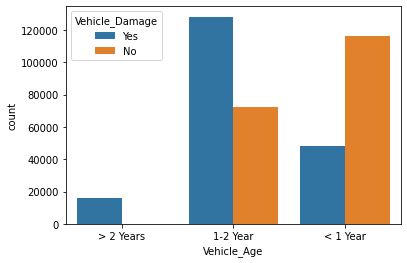

In [20]:
sns.countplot(data=df,x='Vehicle_Age',hue='Vehicle_Damage')

**AGE DISTRIBUTION**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


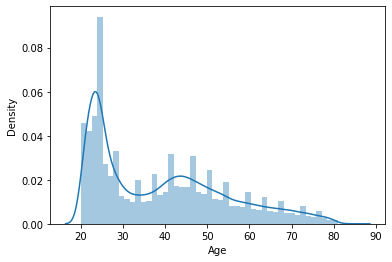

In [21]:
sns.distplot(df['Age'])  #We can say with the below plot that age is distributed from 20 to 80 years of age.

**GENDER vs DRIVING LICENSE**

We can say Male customer's have more driving licence then Female customers.

In [22]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


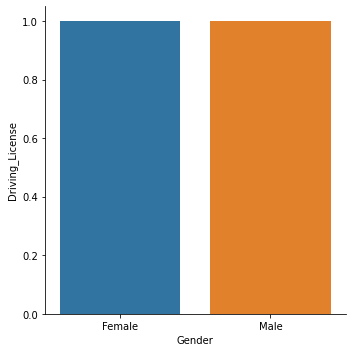

In [23]:
df=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

**COUNT FOR VEHICLE AGE vs RESPONSE**

In [24]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


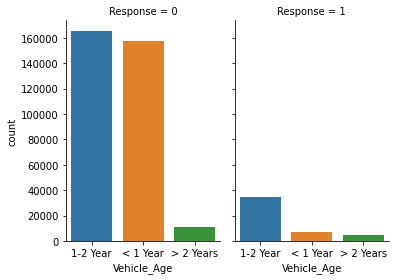

In [25]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

**COUNT FOR VEHICLE DAMAGE vs RESPONSE**


In [26]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


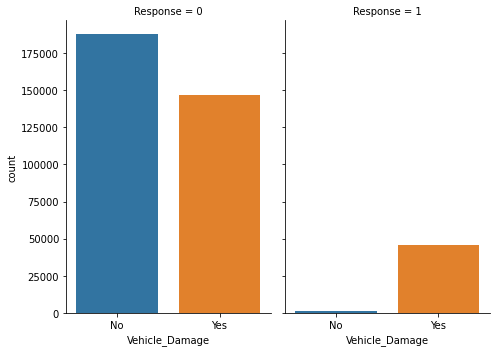

In [27]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",aspect=0.7)

**ANNUAL PREMIUM DISTRIBUTION**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


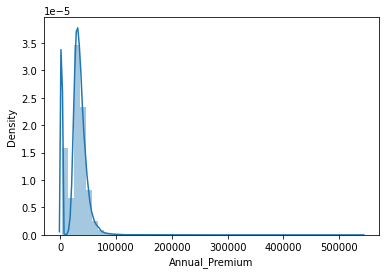

In [28]:
sns.distplot(train['Annual_Premium'])

**VINTAGE**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


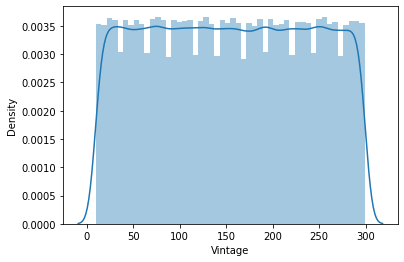

In [29]:
sns.distplot(train['Vintage'])

**Data Preprocessing** 

Categorical data into numeric data

In [24]:
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [25]:
train['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [26]:
train['Vehicle_Damage'].replace({'Yes':1,'No':0},inplace=True)
train['Vehicle_Age']=train['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2, '> 2 Years':3})
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


**Hence data is processed so we can proceed with other steps.**

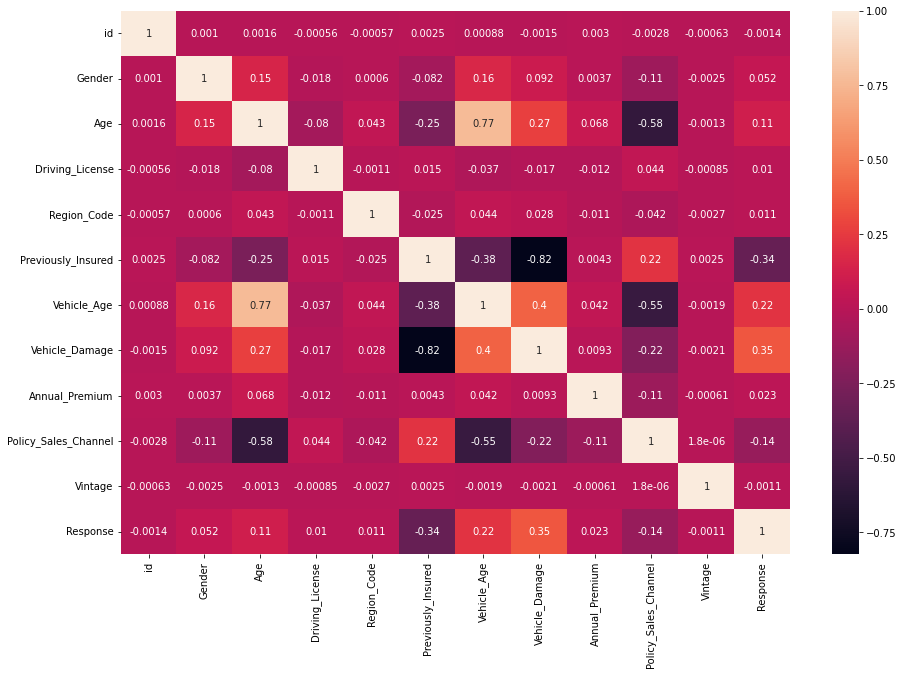

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

**Highly correlated columns wrt to target columns which can give us better accuracy**

We can say 4 features here are very important, that can be use to predict the other behavior of the customer. 

In [36]:
hig_corr = train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

**Separating dependent data and independent data**



In [37]:
X=train.drop(['Response'],axis=1)
print(X.shape)
y=train['Response']
print(y.shape)

(381109, 11)
(381109,)


In [38]:
#Separating train data into train and test(on 20% of the training dataset)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(304887, 11)
(76222, 11)


<font color="red"><b>Modeling</b></font>

We gonna use RandomForestClassifier and XGBoost

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [39]:
#using random forest cleassifier model
model=RandomForestClassifier()
model.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix,r2_score,accuracy_score
y_pred=model.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",model.score(X_test,y_test)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print(model.get_params())
print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     66846
           1       0.40      0.08      0.13      9376

    accuracy                           0.87     76222
   macro avg       0.64      0.53      0.53     76222
weighted avg       0.82      0.87      0.83     76222

Confusion Matrix:
 [[65756  1090]
 [ 8649   727]]
Training Score:
 87.22284904620713
Mean Squared Error:
 0.12777150953792868
R2 score is:
 -0.18440895590690376
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
87.22284904620713


<font color="green"><b>Random Forest Classifier score is : 87.22</b></font>

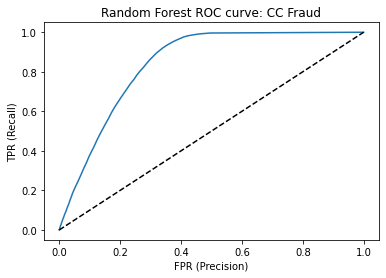

Area under curve (AUC):  0.8402677540802612


In [38]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

<font color="green"><b>Random Forest Classifier AUC is: 84.02</b></font>

<font color="red"><b>XGBOOST</b></font>

In [39]:
from xgboost import XGBClassifier
model1=XGBClassifier()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",model1.score(X_test,y_test)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print(model1.get_params())
print('accuracy score',accuracy_score(y_test,y_pred)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report is:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

Confusion Matrix:
 [[66846     0]
 [ 9376     0]]
Training Score:
 87.69908950171866
Mean Squared Error:
 0.12300910498281337
R2 score is:
 -0.1402626933548754
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
accuracy score 87.69908950171866


<font color="GREEN"><b>XGboost classifier accuracy score is : 87.69</b></font>

In [3]:
y_score = model1.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

NameError: ignored

<font color="GREEN"><b>XGboost classifier accuracy for AUC is : 85.62</b></font>